<center>

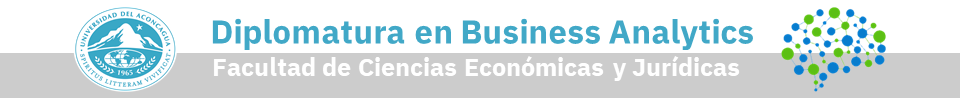

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 11

</font>
</center>

~~~
Apellido y Nombre: Russo Gaston
~~~

**Instrucciones del Trabajo Final**

El conjunto de datos contiene información sobre los clientes de un centro comercial. Se desea utilizar un modelo de Agrupación para crear clusters y tomar una decisión comercial con cada grupo de clientes que ayude a mejorar la relación con el cliente y el monto de dinero que gastan en el centro comercial.

- Desarrollar los puntos necesarios para generar el modelo de Agrupación.
- Puede generar graficos en cualquier instancia del desarrollo.
- Al final del colab, generar una breve conclusión sobre decisiones a tomar con cada cluster.

# **Carga de módulos**

- Creación del dataframe y limpieza de los datos:

In [1]:
import pandas as pd
import numpy as np

- Para gráficos

In [2]:
import plotly.express as px
import plotly.figure_factory as ff
import altair as alt
import matplotlib.pyplot as plt

# **Creación del DataFrame**



In [3]:
datos = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_11_Agrupacion/Mall_Customers.csv"
df = pd.read_csv(datos)
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **Generación del modelo de agrupación**

### Instalamos la librería PyCaret

In [4]:
!pip install pycaret

### Habilitamos Google Colab

In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


### Limpieza del dataframe y visualización de los datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df = df.drop(columns=["CustomerID","Gender","Age"]) #se eliminan las variables no relevantes para este problema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AnnualIncome   200 non-null    int64
 1   SpendingScore  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


### Division del conjunto de grupos

In [8]:
clientes = df.sample(frac=0.75, random_state=0)
clientes_no_vistos = df.drop(clientes.index)

In [9]:
clientes.reset_index(inplace=True, drop=True)
clientes_no_vistos.reset_index(inplace=True, drop=True)

In [10]:
print("Datos para Modelar: " + str(clientes.shape))
print("Datos no vistos para Predicciones: " +
str(clientes_no_vistos.shape))

Datos para Modelar: (150, 2)
Datos no vistos para Predicciones: (50, 2)


### Configuramos el entorno de trabajo PyCaret: habilitamos los modelos de agrupación

In [11]:
from pycaret.clustering import *

In [12]:
agrupacion = setup(clientes, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(150, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(150, 2)"
9,CPU Jobs,-1


In [13]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


### Creamos el modelo K-Means

In [21]:
km = create_model('kmeans', num_clusters=5)
print(km)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5442,172.6977,0.5861,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


### Asignamos el modelo K-Means al dataframe

In [28]:
km_resultados = assign_model(km)
km_resultados.head()

,AnnualIncome,SpendingScore,Cluster
0,23,29,Cluster 3
1,87,13,Cluster 4
2,63,46,Cluster 1
3,61,42,Cluster 1
4,88,69,Cluster 2


In [23]:
km_resultados.shape

(150, 3)

# **Gráficos**

## Visualización de los clusters:

In [24]:
plot_model(km)

## Visualización del Codo:

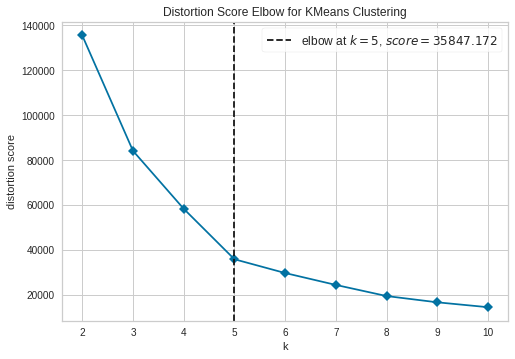

In [25]:
plot_model(km, plot = 'elbow')

## Visualización de la Silueta:

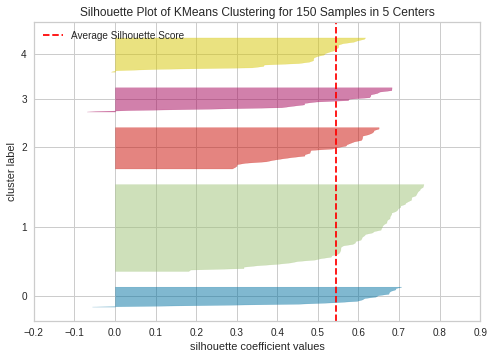

In [26]:
plot_model(km, plot = 'silhouette')

## Visualización de la Distribución

In [27]:
plot_model(km, plot = 'distribution')

### Gráfico de distribución sobre variables

In [29]:
plot_model(km, plot = 'distribution', feature = 'AnnualIncome')

In [30]:
plot_model(km, plot = 'distribution', feature = 'SpendingScore')

### Predecimos sobre datos no disponibles

In [31]:
clientes_no_vistos_prediccion = predict_model(km, data=clientes_no_vistos)
clientes_no_vistos_prediccion.head()

,AnnualIncome,SpendingScore,Cluster
0,19,72,Cluster 0
1,21,66,Cluster 0
2,24,73,Cluster 0
3,28,82,Cluster 0
4,29,31,Cluster 3


# **Conclusiones**

- Se creó el modelo inicialmente con 4 clústers, pero al ver el gráfico "elbow" se identificaron claramente 5 clústers.

- El "clúster 1" que engloba 62 casos sobre 150 (41% del total) está compuesto por clientes que poseen un ingreso promedio de 55.5 y un score promedio de 50.

- Los clústers 0 y 3 comparten similar cantidad de clientes con ingresos anuales entre 20-29 (los de menor ingreso). Sin embargo el clúster 0 tiene de los score más altos, y el 3 de los score más bajos.


- Se recomienda realizar las acciones comerciales correspondientes a motivar que más clientes del clúster 3 pasen al clúster 0.

- Se recomienda revisar y corregir las acciones relacionadas a los clientes del clúster 4 quienes poseen medios y altos ingresos pero son de los que menos compras realizan (score bajos).

- Vemos que la estrategia comercial con el clúster 2 está teniendo éxito, ya que hay una correlación clara entre su medio/alto nivel de ingreso y su score alto de compras. 